In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import random
import os
import tensorflow as tf


mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [3]:
covid_data = pd.read_csv('./covid_dataset.csv')

In [4]:
covid_data.shape

(18056, 22)

In [5]:
covid_data.loc[covid_data['Province/State'].isna(), 'Province/State'] = ''
covid_data['region'] = covid_data['Country/Region'] + ' ' + covid_data['Province/State']

In [6]:
train_df = pd.read_csv("covid19-global-forecasting-week-2/train.csv")
test_df = pd.read_csv("covid19-global-forecasting-week-2/test.csv")

In [7]:
test_df.head()

,ForecastId,Country_Region,Province_State,Date
0,1,Afghanistan,NaN,2020-03-19
1,2,Afghanistan,NaN,2020-03-20
2,3,Afghanistan,NaN,2020-03-21
3,4,Afghanistan,NaN,2020-03-22
4,5,Afghanistan,NaN,2020-03-23


In [437]:
# data_world = train_df.groupby(['Country/Region', 'Date'])[['ConfirmedCases', 'Fatalities']].sum()

In [438]:
# data_world['Lockdown'] = 0
# data_world.loc[(data_world.index.get_level_values('Country/Region')=='China') 
#            & (data_world.index.get_level_values('Date')>='2020-01-24'), 'Lockdown'] = 1

# data_world.loc[(data_world.index.get_level_values('Country/Region')=='Italy') 
#            & (data_world.index.get_level_values('Date')>='2020-03-09'), 'Lockdown'] = 1

# data_world.loc[(data_world.index.get_level_values('Country/Region')=='Iran') 
#            & (data_world.index.get_level_values('Date')>='2020-03-13'), 'Lockdown'] = 1

In [439]:
# # China data
# cn_data = train_df[train_df['Country/Region']=='China'][['Date', 'ConfirmedCases', 'Fatalities']].groupby('Date').sum().reset_index()
# cn_data['Lockdown'] = 0
# cn_data.iloc[2:, -1] = 1

In [ ]:
# # Three countries data
# data_sample = data_world[data_world.index.get_level_values('Country/Region').isin(['China', 'Italy', 'Iran'])]
# data_confirm = data_sample[['ConfirmedCases', 'Lockdown']].droplevel('Country/Region')
# data_confirm = (data_confirm - data_confirm.mean(axis=0)) / data_confirm.std(axis=0)

In [ ]:
# def prepare_confirmed_data(subset, num_cols):
#     mean = subset[num_cols].mean()
#     subset[num_cols] = (subset[num_cols] - subset[num_cols].mean()) / subset[num_cols].std()
#     return subset

In [756]:
data_world = covid_data.groupby(['region', 'day']).sum()

In [757]:
data_world.shape

(18056, 19)

In [758]:
data_world.head()

lat  long       pop  urbanpop  density  medianage  smokers  \
region       day                                                                
Afghanistan  0    33.0  65.0  38928346   9732086       60         18   -999.0   
             1    33.0  65.0  38928346   9732086       60         18   -999.0   
             2    33.0  65.0  38928346   9732086       60         18   -999.0   
             3    33.0  65.0  38928346   9732086       60         18   -999.0   
             4    33.0  65.0  38928346   9732086       60         18   -999.0   

                  tests  testpop  health_exp_pc  hospibed  quarantine  \
region       day                                                        
Afghanistan  0     -999   -999.0           60.0       0.5        -999   
             1     -999   -999.0           60.0       0.5        -999   
             2     -999   -999.0           60.0       0.5        -999   
             3     -999   -999.0           60.0       0.5        -999   
             4     -999   -999.0           60.0       0.5        -999   

                  schools  restrictions  temperature  humidity  confirmed  \
region       day                                                            
Afghanistan  0       -999          -999            4        75          0   
             1       -999          -999            4        63          0   
             2       -999          -999            4        92          0   
             3       -999          -999            6        84          0   
             4       -999          -999            5        62          0   

                  deaths  recovered  
region       day                     
Afghanistan  0         0          0  
             1         0          0  
             2         0          0  
             3         0          0  
             4         0          0

In [759]:
data_min = data_world.min(axis=0)
data_max = data_world.max(axis=0)
data_world = (data_world - data_min) / (data_max - data_min)

In [760]:
data_world.tail()

lat      long       pop  urbanpop  density  medianage  \
region    day                                                               
Zimbabwe  56   0.189592  0.558757  0.011484       0.0      0.0        0.0   
          57   0.189592  0.558757  0.011484       0.0      0.0        0.0   
          58   0.189592  0.558757  0.011484       0.0      0.0        0.0   
          59   0.189592  0.558757  0.011484       0.0      0.0        0.0   
          60   0.189592  0.558757  0.011484       0.0      0.0        0.0   

               smokers  tests  testpop  health_exp_pc  hospibed  quarantine  \
region    day                                                                 
Zimbabwe  56       0.0    0.0      0.0       0.009574       0.0         0.0   
          57       0.0    0.0      0.0       0.009574       0.0         0.0   
          58       0.0    0.0      0.0       0.009574       0.0         0.0   
          59       0.0    0.0      0.0       0.009574       0.0         0.0   
          60       0.0    0.0      0.0       0.009574       0.0         0.0   

               schools  restrictions  temperature  humidity  confirmed  \
region    day                                                            
Zimbabwe  56       0.0           0.0     0.774194  0.768421   0.000000   
          57       0.0           0.0     0.827957  0.600000   0.000000   
          58       0.0           0.0     0.838710  0.578947   0.000015   
          59       0.0           0.0     0.817204  0.547368   0.000044   
          60       0.0           0.0     0.806452  0.526316   0.000044   

               deaths  recovered  
region    day                     
Zimbabwe  56      0.0        0.0  
          57      0.0        0.0  
          58      0.0        0.0  
          59      0.0        0.0  
          60      0.0        0.0

In [761]:
def multivariate_data(dataset, target, 
                      start_index, end_index, 
                      history_size, target_size, 
                      step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return data, labels

In [762]:
data_world.index.get_level_values('region').unique()

Index(['Afghanistan ', 'Albania ', 'Algeria ', 'Andorra ', 'Angola ',
       'Antigua and Barbuda ', 'Argentina ', 'Armenia ',
       'Australia Australian Capital Territory',
       'Australia From Diamond Princess',
       ...
       'United Kingdom Gibraltar', 'United Kingdom Isle of Man',
       'United Kingdom Montserrat', 'United Kingdom United Kingdom',
       'Uruguay ', 'Uzbekistan ', 'Venezuela ', 'Vietnam ', 'Zambia ',
       'Zimbabwe '],
      dtype='object', name='region', length=296)

In [642]:
data_world.iloc[-5:, -3]

region     day
Zimbabwe   56     0.000000
           57     0.000000
           58     0.000015
           59     0.000044
           60     0.000044
Name: confirmed, dtype: float64

In [903]:
## iterate through each country and construct time series data
random.seed(1)
history_data = 14
STEP = 1
X_train = []
y_train = []
X_test = []
y_test = []
for country in data_world.index.get_level_values('region').unique():
    country_data = data_world.loc[country].values

    data, label = multivariate_data(country_data, country_data[:,-3],
                                    0, None, history_data, 7, STEP)
    
    idx_test = random.sample(range(len(data)), int(len(data)*0.2))
    idx_train = [idx for idx in range(len(data)) if idx not in idx_test]
    
    X_test.extend([data[idx] for idx in idx_test])
    y_test.extend([label[idx] for idx in idx_test])
    X_train.extend([data[idx] for idx in idx_train])
    y_train.extend([label[idx] for idx in idx_train])
    
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9472, 14, 19)
(9472, 7)
(2368, 14, 19)
(2368, 7)


In [904]:
BATCH_SIZE = 100
BUFFER_SIZE = 10000
train_data_multi = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
test_data_multi = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_data_multi = test_data_multi.batch(BATCH_SIZE).repeat()

In [905]:
confirmed_model = tf.keras.models.Sequential()
confirmed_model.add(tf.keras.layers.LSTM(32, return_sequences=True, input_shape=X_train.shape[-2:]))
confirmed_model.add(tf.keras.layers.LSTM(16, activation='relu'))
confirmed_model.add(tf.keras.layers.Dense(7))

confirmed_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mae')

In [906]:
history = confirmed_model.fit(train_data_multi, steps_per_epoch=200, 
                              validation_data=test_data_multi,
                              validation_steps=50, epochs=50)

Train for 200 steps, validate for 50 steps
Epoch 1/50
200/200 [==============================] - 8s 40ms/step - loss: 0.0079 - val_loss: 0.0044
Epoch 2/50
200/200 [==============================] - 5s 24ms/step - loss: 0.0035 - val_loss: 0.0025
Epoch 3/50
200/200 [==============================] - 5s 24ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 4/50
200/200 [==============================] - 4s 21ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 5/50
200/200 [==============================] - 4s 22ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 6/50
200/200 [==============================] - 4s 22ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 7/50
200/200 [==============================] - 5s 24ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 8/50
200/200 [==============================] - 4s 21ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 9/50
200/200 [==============================] - 4s 21ms/step - loss: 0.0020 - val_loss: 0.0025
Epoch 10/50
200/200 [===========================

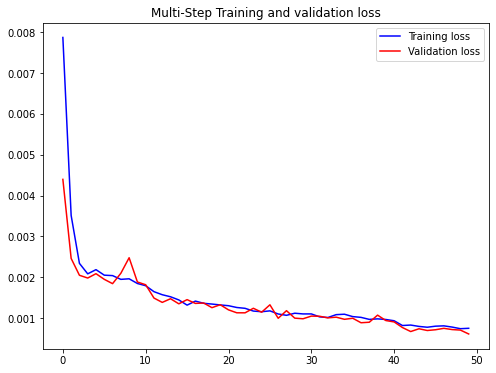

In [907]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    
    
    plt.figure()
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()
    plt.show()

plot_train_history(history, 'Multi-Step Training and validation loss')

In [908]:
def create_time_steps(length):
    return list(range(-length, 0))

def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize=(12, 6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)

    plt.plot(num_in, np.array(history[:, -3]), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
                 label='Predicted Future')
    plt.legend(loc='upper left')
    plt.show()

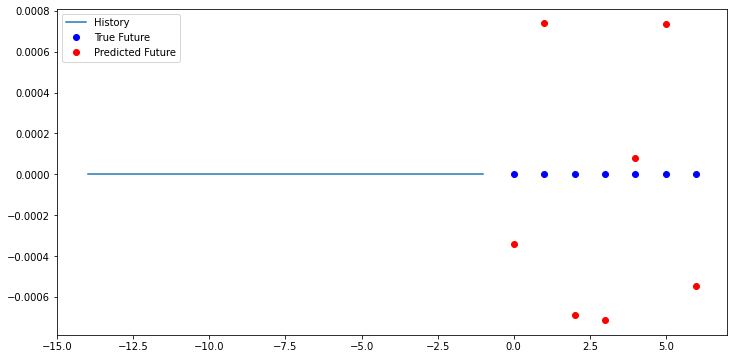

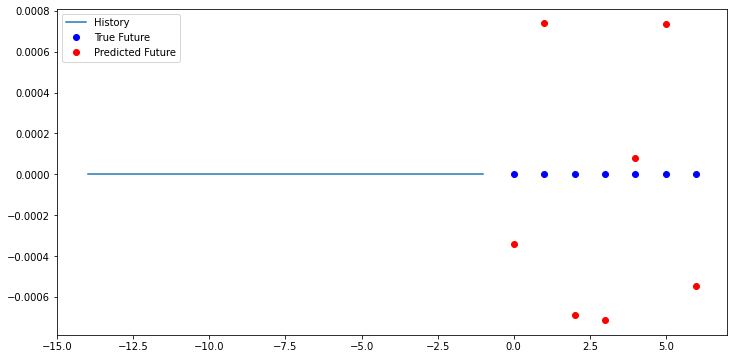

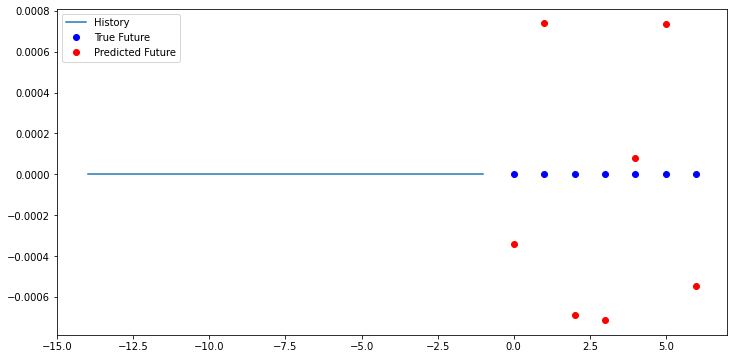

In [909]:
for x, y in test_data_multi.shuffle(2000).take(3):
    multi_step_plot(x[0], y[0], model.predict(x)[0])

In [862]:
# df_date = pd.date_range(start='22/01/2020', end='22/03/2020').to_frame(index=False, name='date')

# covid_data = pd.merge(covid_data, df_date, how='left', left_on='day', right_index=True)

# interim_data = pd.merge(test_df[['ForecastId','Country/Region', 'Province/State', 'Date']], 
#                         covid_data[['Country/Region', 'Province/State', 'date', 'confirmed', 'deaths']], 
#                         how='left', 
#                         left_on=['Country/Region', 'Province/State', 'Date'], 
#                         right_on=['Country/Region', 'Province/State', 'date'])

In [910]:
df_pred_confirmed = pd.DataFrame()
for country in data_world.index.get_level_values('region').unique():
    country_data = data_world.loc[country].values
    data = country_data[-14:, ]

    output_data = data[:,-3].tolist()
    for i in range(5):
        input_data = data[-14:, ]
        output_data.extend(confirmed_model.predict(input_data.reshape(1, 14, 19)).tolist()[0])
        i+=1
    
    df = pd.DataFrame({'Region':country, 'Date':pd.date_range(start='2020-03-09', end='2020-04-26'), 'confirmed':output_data})
    df_pred_confirmed = pd.concat([df_pred_confirmed, df], ignore_index=True)

In [911]:
df_pred_confirmed.loc[df_pred_confirmed['confirmed']<0, 'confirmed'] = 0
df_pred_confirmed['confirmed'] = df_pred_confirmed['confirmed'] * (data_max['confirmed'] - data_min['confirmed']) + data_min['confirmed']

In [899]:
df_pred.loc[df_pred['deaths']<0, 'deaths'] = 0
df_pred['deaths'] = df_pred['deaths'] * (data_max['deaths'] - data_min['deaths']) + data_min['deaths']

,Region,Date,deaths
0,Afghanistan,2020-03-09,0.000000
1,Afghanistan,2020-03-10,0.000000
2,Afghanistan,2020-03-11,0.000000
3,Afghanistan,2020-03-12,0.000000
4,Afghanistan,2020-03-13,0.000000
...,...,...,...
14499,Zimbabwe,2020-04-22,0.726864
14500,Zimbabwe,2020-04-23,0.058083
14501,Zimbabwe,2020-04-24,1.207763
14502,Zimbabwe,2020-04-25,0.000000


In [881]:
test_df.loc[test_df['Province/State'].isna(), 'Province/State'] = ''
test_df.Date=pd.to_datetime(test_df.Date)
test_df['Region'] = test_df['Country/Region'] + ' ' + test_df['Province/State']

In [901]:
df_submit = pd.merge(test_df, df_pred, how='left', on=['Region','Date'])

In [912]:
df_submit = pd.merge(df_submit, df_pred_confirmed, how='left', on=['Region','Date'])

In [918]:
df_submit

,ForecastId,Province/State,Country/Region,Lat,Long,Date,Region,deaths,confirmed
0,1,,Afghanistan,33.0000,65.0000,2020-03-12,Afghanistan,0.0,7.0
1,2,,Afghanistan,33.0000,65.0000,2020-03-13,Afghanistan,0.0,7.0
2,3,,Afghanistan,33.0000,65.0000,2020-03-14,Afghanistan,0.0,11.0
3,4,,Afghanistan,33.0000,65.0000,2020-03-15,Afghanistan,0.0,16.0
4,5,,Afghanistan,33.0000,65.0000,2020-03-16,Afghanistan,0.0,21.0
...,...,...,...,...,...,...,...,...,...
12207,12208,,Zambia,-15.4167,28.2833,2020-04-19,Zambia,1.0,2.0
12208,12209,,Zambia,-15.4167,28.2833,2020-04-20,Zambia,2.0,0.0
12209,12210,,Zambia,-15.4167,28.2833,2020-04-21,Zambia,0.0,12.0
12210,12211,,Zambia,-15.4167,28.2833,2020-04-22,Zambia,1.0,10.0


In [916]:
df_submit.deaths = df_submit.deaths.round()

In [917]:
df_submit.confirmed = df_submit.confirmed.round()

In [928]:
df_submit[df_submit.confirmed.isna()].Region.value_counts()

Reunion                            43
US US                              43
Republic of the Congo              43
Greenland                          43
Aruba                              43
US United States Virgin Islands    43
Guadeloupe                         43
Mayotte                            43
Guam                               43
Korea, South                       43
Puerto Rico                        43
Guernsey                           43
Gambia, The                        43
French Guiana                      43
Jersey                             43
Name: Region, dtype: int64

In [920]:
df_submit.to_csv('sub.csv', index=False, columns=['ForecastId', 'confirmed', 'deaths'], header=['ForecastId','ConfirmedCases','Fatalities'])

8379     0.000000
8380     0.000000
8381     0.000000
8382     0.000000
8383     2.000000
8384     2.000000
8385     2.000000
8386     2.000000
8387     3.000000
8388     4.000000
8389     4.000000
8390     5.000000
8391     5.000000
8392     8.000000
8393     0.000000
8394    11.882384
8395     9.642727
8396     6.437776
8397     3.223222
8398     6.947433
8399     1.933969
8400     0.000000
8401    11.882384
8402     9.642727
8403     6.437776
8404     3.223222
8405     6.947433
8406     1.933969
8407     0.000000
8408    11.882384
8409     9.642727
8410     6.437776
8411     3.223222
8412     6.947433
8413     1.933969
8414     0.000000
8415    11.882384
8416     9.642727
8417     6.437776
8418     3.223222
8419     6.947433
8420     1.933969
8421     0.000000
8422    11.882384
8423     9.642727
8424     6.437776
8425     3.223222
8426     6.947433
8427     1.933969
Name: confirmed, dtype: float64